In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import scipy

In [2]:
# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

## Checking the image size


In [3]:
from PIL import Image

# Open the image file
img = Image.open('images/test/active/8.jpg')  # Replace 'your_image.jpg' with your image file path

# Get the width and height of the image
width, height = img.size

# Print the dimensions
print(f"Image Width: {width}px, Height: {height}px")
import platform
platform.system()

Image Width: 48px, Height: 48px


'Darwin'

In [11]:
import tensorflow
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image

# Load datasets
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

def load_images(image_paths, img_size=(48, 48)):
    images = []
    for path in image_paths:
        unix_path = path.replace('\\', '/')
        path = path if platform.system() == 'Windows' else unix_path
        # Open image, resize it and convert to grayscale 
        img = Image.open(path).resize(img_size).convert('L') 
        # Convert image to numpy array and normalize (rescale) it
        img = np.array(img) / 255.0
        images.append(img)
    
    return np.array(images)


X_train = load_images(train_set['path'].values)
y_train = train_set['label'].values

X_test = load_images(test_set['path'].values)
y_test = test_set['label'].values

# Reshape the data
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = Sequential([])
# Define the model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize the ImageDataGenerator using data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model on the training data
history=model.fit(datagen.flow(X_train, y_train, batch_size=48), epochs=30, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

model.summary()

# Save the model
model.save('my_model.h5')


Epoch 1/30
202/202 [==============================] - 16s 77ms/step - loss: 0.6769 - accuracy: 0.5950 - val_loss: 0.6551 - val_accuracy: 0.6237
Epoch 2/30
202/202 [==============================] - 15s 77ms/step - loss: 0.6648 - accuracy: 0.6072 - val_loss: 0.6516 - val_accuracy: 0.6188
Epoch 3/30
202/202 [==============================] - 16s 77ms/step - loss: 0.6582 - accuracy: 0.6145 - val_loss: 0.6355 - val_accuracy: 0.6344
Epoch 4/30
202/202 [==============================] - 16s 77ms/step - loss: 0.6512 - accuracy: 0.6135 - val_loss: 0.6656 - val_accuracy: 0.5812
Epoch 5/30
202/202 [==============================] - 15s 74ms/step - loss: 0.6413 - accuracy: 0.6278 - val_loss: 0.6271 - val_accuracy: 0.6592
Epoch 6/30
202/202 [==============================] - 15s 76ms/step - loss: 0.6419 - accuracy: 0.6320 - val_loss: 0.6174 - val_accuracy: 0.6576
Epoch 7/30
202/202 [==============================] - 15s 72ms/step - loss: 0.6339 - accuracy: 0.6373 - val_loss: 0.6050 - val_accuracy:

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Plotting the model performance

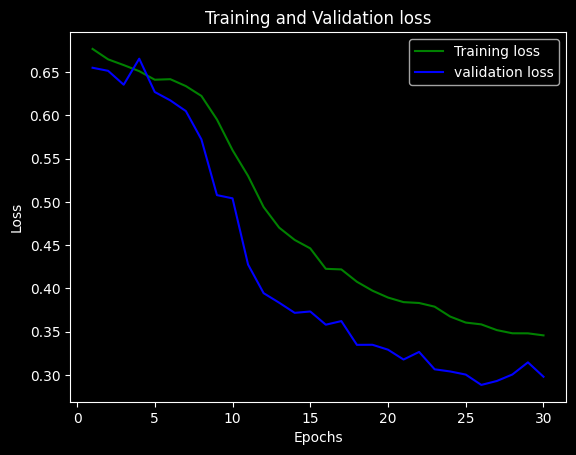

In [13]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

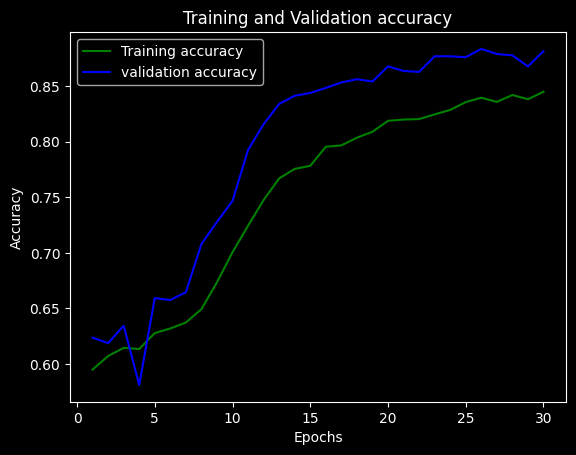

In [16]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Running the Model

In [4]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

# Load the trained model
model = load_model('my_model.h5')


def load_single_image(path, img_size=(48, 48)):
    images = []
    unix_path = path.replace('\\', '/')
    path = path if platform.system() == 'Windows' else unix_path
    # Open image, resize it and convert to grayscale 
    img = Image.open(path).resize(img_size).convert('L') 
    # Convert image to numpy array and normalize (rescale) it
    img = np.array(img) / 255.0
    images.append(img)
    
    return np.array(images)
# Path to the new image
def fatigue_pred(image_path):
    # Preprocess the image
    preprocessed_image = load_single_image(image_path)

    # Predict the class with the model
    prediction = model.predict(preprocessed_image,verbose=0)
    print(prediction)
    predicted_class = int(prediction > 0.2)  # Using 0.5 as the threshold
    return True if not predicted_class else False
